# Project: Investigating a Movie's Success

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database. The columns of this data set are id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj. The focus of the investigation will be on what makes a movie successful, as determined by a high vote_average.

In [78]:
import pandas as pd
import numpy as np
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [79]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Some columns, such as homepage, tagline, and overview, are not useful to our analysis and can be dropped. Judging by the information given, there are some rows with null values.

In [81]:
def checkZero(df, column):
    return (df[column] == 0).any()

In [82]:
checkZero(df, 'budget')

True

In [83]:
checkZero(df, 'runtime')

True

In [84]:
checkZero(df, 'vote_count')

False

Two variables that will be used in the analysis, budget and runtime, have zero values. Rows with zero values as well as those with null values will need to be removed in the data cleaning portion.

In [85]:
# check for duplicates in the data
sum(df.duplicated())

1

There is one duplicate row that needs to be dropped.

### Data Cleaning

In [86]:
# drop duplicates and confirm correction
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [87]:
# drop homepage, tagline, and overview columns and confirm correction
df = df.drop(['homepage','tagline','overview'],axis=1)
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Duplicates in the data were removed. The homepage, tagline, and overview aren't going to be used in the analysis since they don't present a direct way to measure the success of the film so these columns were removed. This makes the dataframe appear neater as well since not all columns were visible after the df.head(5) command was run previously.

In [88]:
df = df[df['budget'] != 0]

In [89]:
checkZero(df, 'budget')

False

In [90]:
df = df[df['runtime'] != 0]

In [91]:
checkZero(df, 'runtime')

False

Rows in which budget or runtime is 0 were removed from the dataframe. This was verified using the checkZero function created in the General Properties section. Of all the variables used for analysis (vote_average, vote_count, budget, and runtime), none have null values so we don't have to worry about removing rows with null values.



<a id='eda'></a>
## Exploratory Data Analysis

### What attributes of a movie result in a higher vote average?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b3a26ef0>]], dtype=object)

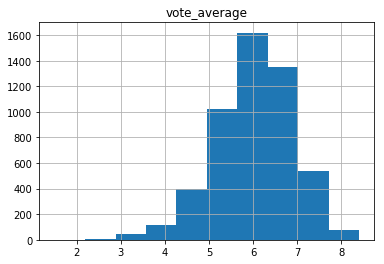

In [96]:
df.hist('vote_average')

In [97]:
df['vote_average'].mean()

6.0331010452961671

The data is slightly left-skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b3ac1cf8>]], dtype=object)

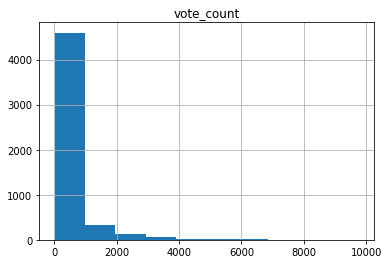

In [98]:
df.hist('vote_count')

The data is very right-skewed, and the vast majority of vote counts on a movie are in the first bin (between 0 and roughly 1000).

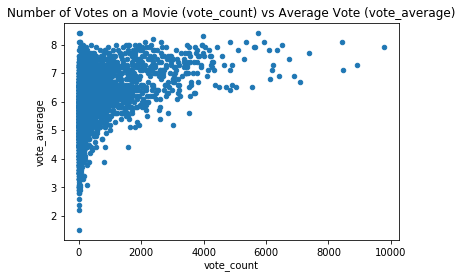

In [100]:
df.plot(x='vote_count',y='vote_average',kind='scatter',title='Number of Votes on a Movie (vote_count) vs Average Vote (vote_average)')

From this plot, we see that if a lot of people (> 4000) voted on a movie, the vote average will be higher than the mean. This leads me to wonder if more "popular" movies, which tend to have higher budgets, lead to a higher than average vote_average.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b38ba0f0>]], dtype=object)

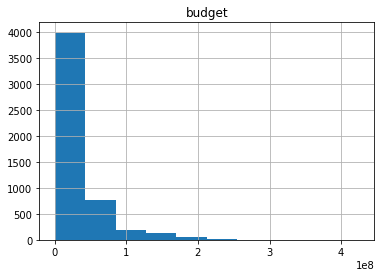

In [101]:
df.hist('budget')

The histogram for budget is very right-skewed, with most movies having a budget between 0 and roughly 40 million.

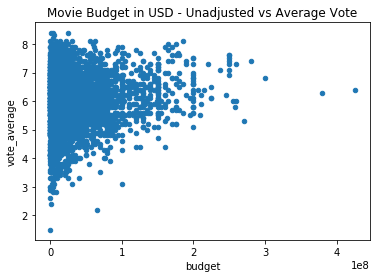

In [102]:
df.plot(x='budget',y='vote_average',kind='scatter', title='Movie Budget in USD - Unadjusted vs Average Vote')

There doesn't appear to be a strong correlation between budget and vote_average. However, a very high budget (> 2e8) reliably results in films with a vote_average near or above the mean vote_average

### Does runtime influence a movie's vote average?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6b376e940>]], dtype=object)

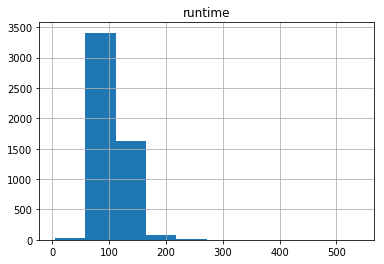

In [104]:
df.hist('runtime')

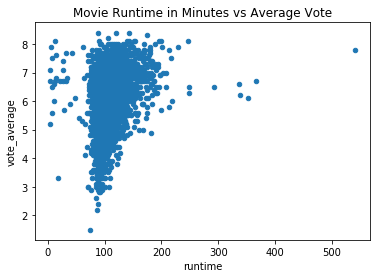

In [105]:
df.plot(x='runtime',y='vote_average',kind='scatter',title='Movie Runtime in Minutes vs Average Vote')

In [106]:
df['runtime'].mean()

107.15834301200155

There isn't a strong correlation between runtime and vote_average. Near the mean runtime, the vote_average points span the full range. Interestingly, movies with a runtime above 200 minutes reliably result in vote averages near or above the mean.

<a id='conclusions'></a>
## Conclusions

Though there are no strong correlations between runtime, budget, or vote_count with vote_average, based on this data it seems that if more than 4000 people vote on a movie, the movies is over 200 minutes long, or the budget is over 2e8, the movie will likely have a vote_average near or above the average vote_average of 5.98. There are of course some limitations to this investigation. For one, the investigation was focused on determining the "success" of the film but focused only on the vote_average as a measure of success. Popularity and revenue could have also been investigated as a measure of success for stronger analysis and conclusions. Secondly, the adjusted budget was also given, but I focused on the unadjusted budget in my analysis. Finally, information such as cast members, producers, and directors, which likely have a major influence on a film's success, were not accounted for.